In [1]:
import os
import numpy as np
from py_helpers import *
import matplotlib.pyplot as plt

# Define the path to the data
resnet_coordinate_regression = "/media/hsa22/Expansion/deeplearning_test/regression_coords/streamline_predictions/resnet_regression_coords/ResnetEncoder_Streamlines"

In [2]:
# Grab all the npy files
coord_regression_npy_files = glob_files(resnet_coordinate_regression, "npy")
coord_regression_loss_files = [file for file in coord_regression_npy_files if "loss" in file]
coord_regression_grad_files = [file for file in coord_regression_npy_files if "grad" in file]

# Grab the training and validation files
coord_regression_loss_train_files = [file for file in coord_regression_loss_files if "train" in file]
coord_regression_loss_val_files = [file for file in coord_regression_loss_files if "val" in file]
coord_regression_grad_train_files = [file for file in coord_regression_grad_files if "train" in file]
coord_regression_grad_val_files = [file for file in coord_regression_grad_files if "val" in file]

In [3]:
# Arrays to store the loss values
coord_regression_loss_train_array = []
coord_regression_loss_val_array = []
coord_regression_grad_train_array = []
coord_regression_grad_val_array = []

# Function to load the values into an array
def load_npy(files_list, array):
    for file in files_list:
        array.append(np.load(file))
    return array

# Load the values
coord_regression_loss_train_array = load_npy(coord_regression_loss_train_files, coord_regression_loss_train_array)
coord_regression_loss_val_array = load_npy(coord_regression_loss_val_files, coord_regression_loss_val_array)
coord_regression_grad_train_array = load_npy(coord_regression_grad_train_files, coord_regression_grad_train_array)
coord_regression_grad_val_array = load_npy(coord_regression_grad_val_files, coord_regression_grad_val_array)

print("Loaded all the values")
print("Shape of the loss train array: {}".format(np.shape(coord_regression_loss_train_array)))
print("Shape of the loss val array: {}".format(np.shape(coord_regression_loss_val_array)))
print("Shape of the grad train array: {}".format(np.shape(coord_regression_grad_train_array)))
print("Shape of the grad val array: {}".format(np.shape(coord_regression_grad_val_array)))


Loaded all the values
Shape of the loss train array: (12, 2, 70, 39)
Shape of the loss val array: (12, 1, 70, 39)
Shape of the grad train array: (12, 2, 70, 39)
Shape of the grad val array: (0,)


In [4]:
# Define the indices
epoch_idx = 0
batch_idx = 1
streamline_idx = 2
node_idx = 3

# Find the mean over the node losses for every streamline
def streamline_mean(losses):
    # Get the mean over the node losses
    mean_loss = np.mean(losses, axis=node_idx)
    return mean_loss

# Find the mean over the streamline losses for every batch
def batch_mean(losses):
    # Get the mean over the streamline losses
    mean_loss = np.mean(losses, axis=streamline_idx)
    return mean_loss

# Find the mean over the batch losses for every epoch
def epoch_mean(losses):
    # Get the mean over the batch losses
    mean_loss = np.mean(losses, axis=batch_idx)
    return mean_loss

In [5]:
# Get the mean node, streamline, and batch losses - TRAINING
coord_regression_loss_train_mean_nodes = streamline_mean(coord_regression_loss_train_array)
coord_regression_loss_train_mean_streamlines = batch_mean(coord_regression_loss_train_mean_nodes)
coord_regression_loss_train_mean_batch = epoch_mean(coord_regression_loss_train_mean_streamlines)

print("Shape of the mean node loss: {}".format(coord_regression_loss_train_mean_nodes.shape))
print("Shape of the mean streamline loss: {}".format(coord_regression_loss_train_mean_streamlines.shape))
print("Shape of the mean batch loss: {}".format(coord_regression_loss_train_mean_batch.shape))

# Get the mean node, streamline, and batch losses - VALIDATION
coord_regression_loss_val_mean_nodes = streamline_mean(coord_regression_loss_val_array)
coord_regression_loss_val_mean_streamlines = batch_mean(coord_regression_loss_val_mean_nodes)
coord_regression_loss_val_mean_batch = epoch_mean(coord_regression_loss_val_mean_streamlines)

print("Shape of the mean node loss: {}".format(coord_regression_loss_val_mean_nodes.shape))
print("Shape of the mean streamline loss: {}".format(coord_regression_loss_val_mean_streamlines.shape))
print("Shape of the mean batch loss: {}".format(coord_regression_loss_val_mean_batch.shape))

Shape of the mean node loss: (12, 2, 70)
Shape of the mean streamline loss: (12, 2)
Shape of the mean batch loss: (12,)
Shape of the mean node loss: (12, 1, 70)
Shape of the mean streamline loss: (12, 1)
Shape of the mean batch loss: (12,)


In [6]:
# Get the mean node, streamline, and batch gradients - TRAINING
coord_regression_grad_train_mean_nodes = streamline_mean(coord_regression_grad_train_array)
coord_regression_grad_train_mean_streamlines = batch_mean(coord_regression_grad_train_mean_nodes)
coord_regression_grad_train_mean_batch = epoch_mean(coord_regression_grad_train_mean_streamlines)

print("Shape of the mean node grad: {}".format(coord_regression_grad_train_mean_nodes.shape))
print("Shape of the mean streamline grad: {}".format(coord_regression_grad_train_mean_streamlines.shape))
print("Shape of the mean batch grad: {}".format(coord_regression_grad_train_mean_batch.shape))

Shape of the mean node grad: (12, 2, 70)
Shape of the mean streamline grad: (12, 2)
Shape of the mean batch grad: (12,)


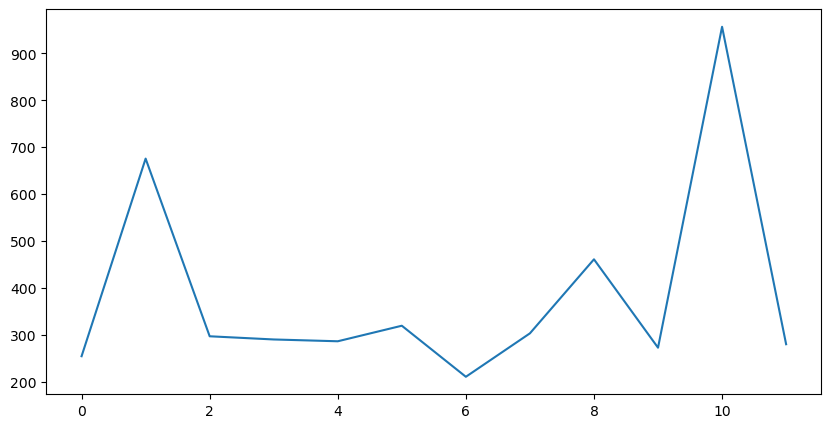

In [17]:
# Plot the loss curves for the training and validation sets

plt.figure(figsize=(10, 5))
plt.plot(coord_regression_loss_train_mean_nodes[:, 0, 5])